In [1]:
!pip install tweepy

In [2]:
!pip install libfreetype6-dev

ERROR: Could not find a version that satisfies the requirement libfreetype6-dev (from versions: none)
ERROR: No matching distribution found for libfreetype6-dev


In [3]:
!pip install TextBlob

In [4]:
!pip install wordCloud

In [5]:

import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [6]:
consumerKey ="QajFk5P0cSdxcQBY1uHNzcQei"#confidential
consumerSecret ="EBXzfLMbEVdDjZOiXPJkLF4CwmJNcqQP8Zv5DjeDd4FeJfSMfu" #confidential
accessToken  ="1373100960684253185-dhWIrZ7sjDk59F6ZwCYaE1hlgUOJby" #confidential
accessTokenSecret ="co7XO7NMb4WjvEjp7j8nUKOJRQBrMpX4JPs2d8PHIYvTg" # confidential

In [7]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [8]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="ArvindKejriwal", count = 100, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Unexpected parameter: lang


Show the 5 recent tweets:

1) Visited Pale Village in Goa to meet mining workers. In 6 months of AAP being in power, mining industry will be resumed in Goa. Monthly allowances will be given till then and priority in employment in mining industry will be given to those who suffered from job losses. https://t.co/okYAZUDSHy

2) 08 Nov -

AQI - 390 (301 to 400 - Very Poor)

PM10 - 388 (351-430 - Very Poor)

PM2.5 - 245 (121 to 250 - Very Poor)

3) गोंयातलें एक जागृत देवस्थान. होंडाचे आजोबा देवस्थान. देवाक नमन करून आशिर्वाद घेतलो. https://t.co/AuvqJIJDOk

4) गोंय मुक्त जावन 60 वर्सां जालीं तरी सत्तरी म्हालांतल्या ह्या लोकांक आपल्या जाग्याचो मालकी हक्क मेळूंक ना. आज बदरूक आनी मावशी गांवांतल्या लोकांक मेळ्ळों आनी गोंयांत आपाचें सरकार स्थापन जातकर तांकां तांचो हक्क दिवपाचें आस्वासन दिलें. https://t.co/JMfymQOnPt

5) Birthday greetings to Shri LK Advani Ji. Praying for his long and healthy life.



In [9]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,Visited Pale Village in Goa to meet mining wor...
1,08 Nov -\n\nAQI - 390 (301 to 400 - Very Poor)...
2,गोंयातलें एक जागृत देवस्थान. होंडाचे आजोबा देव...
3,गोंय मुक्त जावन 60 वर्सां जालीं तरी सत्तरी म्ह...
4,Birthday greetings to Shri LK Advani Ji. Prayi...


In [10]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,Visited Pale Village in Goa to meet mining wor...
1,08 Nov -\n\nAQI - 390 (301 to 400 - Very Poor)...
2,गोंयातलें एक जागृत देवस्थान. होंडाचे आजोबा देव...
3,गोंय मुक्त जावन 60 वर्सां जालीं तरी सत्तरी म्ह...
4,Birthday greetings to Shri LK Advani Ji. Prayi...
...,...
95,सभी देशवासियों को ईद-ए-मिलाद-उन-नबी की मुबारक़...
96,Air quality is good today due to rains\n\n18 O...
97,प्रदूषण के ख़िलाफ़ इस युद्ध में आप भी अपना योग...
98,: दिल्ली को EV Capital बनाने की दिशा में मुख्य...


In [11]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,Visited Pale Village in Goa to meet mining wor...,0.180,-0.210
1,08 Nov -\n\nAQI - 390 (301 to 400 - Very Poor)...,0.780,-0.520
2,गोंयातलें एक जागृत देवस्थान. होंडाचे आजोबा देव...,0.000,0.000
3,गोंय मुक्त जावन 60 वर्सां जालीं तरी सत्तरी म्ह...,0.000,0.000
4,Birthday greetings to Shri LK Advani Ji. Prayi...,0.450,0.225
...,...,...,...
95,सभी देशवासियों को ईद-ए-मिलाद-उन-नबी की मुबारक़...,0.000,0.000
96,Air quality is good today due to rains\n\n18 O...,0.555,0.535
97,प्रदूषण के ख़िलाफ़ इस युद्ध में आप भी अपना योग...,0.000,0.000
98,: दिल्ली को EV Capital बनाने की दिशा में मुख्य...,0.000,0.000


In [12]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,Visited Pale Village in Goa to meet mining wor...,0.180,-0.210,Negative
1,08 Nov -\n\nAQI - 390 (301 to 400 - Very Poor)...,0.780,-0.520,Negative
2,गोंयातलें एक जागृत देवस्थान. होंडाचे आजोबा देव...,0.000,0.000,Neutral
3,गोंय मुक्त जावन 60 वर्सां जालीं तरी सत्तरी म्ह...,0.000,0.000,Neutral
4,Birthday greetings to Shri LK Advani Ji. Prayi...,0.450,0.225,Positive
...,...,...,...,...
95,सभी देशवासियों को ईद-ए-मिलाद-उन-नबी की मुबारक़...,0.000,0.000,Neutral
96,Air quality is good today due to rains\n\n18 O...,0.555,0.535,Positive
97,प्रदूषण के ख़िलाफ़ इस युद्ध में आप भी अपना योग...,0.000,0.000,Neutral
98,: दिल्ली को EV Capital बनाने की दिशा में मुख्य...,0.000,0.000,Neutral


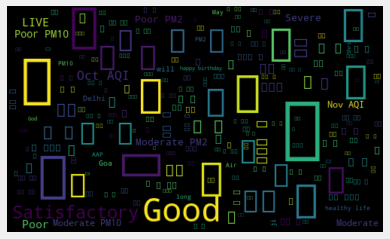

In [14]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

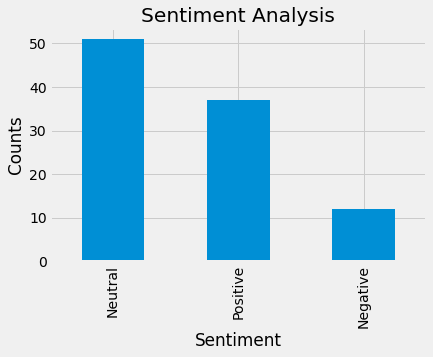

In [13]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()